In [64]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [72]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90.000, 90.000, size=2000)

lngs = np.random.uniform(-180.000, 180.000, size=2000)

lat_lngs = zip(lats, lngs)

lat_lngs

In [73]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [74]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-61.80064651452547 107.95098395989874
-74.70086909102645 -27.221908358240626
32.39279846531903 -25.22913041214187
-27.11084990751211 21.07695870376773
4.3148473159337755 -127.73453827186353
-28.113725407496275 -36.243410675909956
-89.60849588625047 91.17194650242277
60.62202471530924 -104.65172009728957
-35.63053066984991 42.66786180160025
10.011417212597564 153.23801010430168
-4.795386462081538 11.973979049716121
-84.34092195808418 -37.22911748407739
84.44384361037604 85.83031891605151
78.60949343849128 -35.22175066919917
-11.848454369974661 -17.683211762091673
-9.683877460872154 88.9271462685681
-66.41447732555842 64.35597871514551
72.45501682082161 3.475492120188875
-75.44072649253164 -41.31718212075302
81.83903347640205 92.58947455982798
25.32076264889676 -124.20876525119553
-67.82430310992578 32.46126420176003
56.763463843709275 -149.18847384003396
85.47572283491121 -59.47238925982981
58.379535860072934 -179.6544935223747
-7.3696171942075495 -148.38361838178568
-4.363301313052489 

In [75]:
from citipy import citipy

In [76]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count.

len(cities)

759

In [77]:
# import environment variable containing weather data api key.

import os
from dotenv import load_dotenv
load_dotenv()

weather_api_key = os.getenv('weather_api_key')

In [78]:
# Import requests library

import requests

# build url

url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

In [79]:
# Import the time library and the datetime module form the datetime library

import time

from datetime import datetime

In [80]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = f"{url}&q={city.replace(' ','')}"
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City" : city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data loading is complete.

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
                                                    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vila franca do campo
City not found. Skipping...
Processing Record 4 of Set 1 | bokspits
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 7 of Set 1 | la ronge
City not found. Skipping...
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | loandjili
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bud
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | san quintin
City not found. Skipping...
Proce

In [81]:
len(city_data)

596

In [83]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,295.67,88,31,2.05,US,2022-07-20 05:38:06
1,Ushuaia,-54.8000,-68.3000,275.96,87,75,6.17,AR,2022-07-20 05:40:43
2,Atuona,-9.8000,-139.0333,298.30,76,57,6.07,PF,2022-07-20 05:42:04
3,Kavieng,-2.5744,150.7967,301.68,71,100,2.99,PG,2022-07-20 05:42:06
4,Loandjili,-4.7561,11.8578,294.21,94,75,1.54,CG,2022-07-20 05:42:07
5,Dikson,73.5069,80.5464,281.53,60,68,8.11,RU,2022-07-20 05:42:07
6,Tasiilaq,65.6145,-37.6368,276.24,92,87,2.96,GL,2022-07-20 05:42:08
7,Georgetown,5.4112,100.3354,305.31,70,20,4.63,MY,2022-07-20 05:41:07
8,Padang,-0.9492,100.3543,303.18,70,100,2.39,ID,2022-07-20 05:42:09
9,Bud,39.4470,-86.1758,297.12,92,1,2.75,US,2022-07-20 05:42:10


In [85]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                            "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-20 05:38:06,42.6001,-73.9662,295.67,88,31,2.05
1,Ushuaia,AR,2022-07-20 05:40:43,-54.8000,-68.3000,275.96,87,75,6.17
2,Atuona,PF,2022-07-20 05:42:04,-9.8000,-139.0333,298.30,76,57,6.07
3,Kavieng,PG,2022-07-20 05:42:06,-2.5744,150.7967,301.68,71,100,2.99
4,Loandjili,CG,2022-07-20 05:42:07,-4.7561,11.8578,294.21,94,75,1.54
5,Dikson,RU,2022-07-20 05:42:07,73.5069,80.5464,281.53,60,68,8.11
6,Tasiilaq,GL,2022-07-20 05:42:08,65.6145,-37.6368,276.24,92,87,2.96
7,Georgetown,MY,2022-07-20 05:41:07,5.4112,100.3354,305.31,70,20,4.63
8,Padang,ID,2022-07-20 05:42:09,-0.9492,100.3543,303.18,70,100,2.39
9,Bud,US,2022-07-20 05:42:10,39.4470,-86.1758,297.12,92,1,2.75


In [87]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [89]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

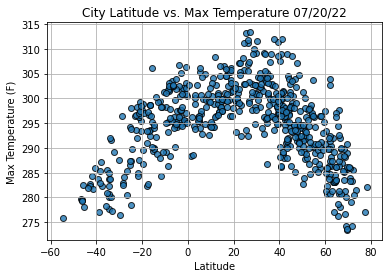

In [91]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

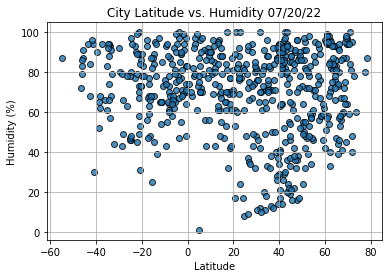

In [93]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            humidity,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

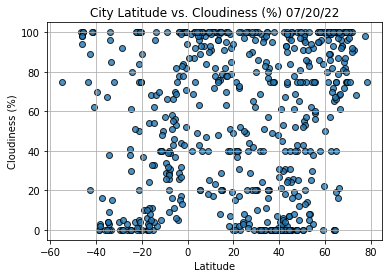

In [94]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            cloudiness,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

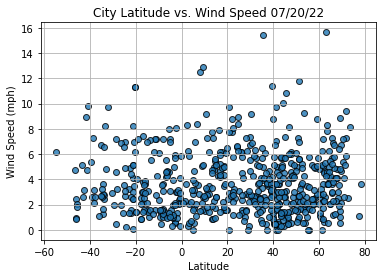

In [95]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            wind_speed,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()